# Linear methods for regression

In [ ]:
# Suppress warning
import warnings
warnings.filterwarnings("ignore")

# Import dependent packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import scipy as sp
from scipy import linalg
plt.style.use('seaborn')

We will use "Seoul Bike" dataset, it can can be downloaded:
* <a href="https://www.kaggle.com/c/seoul-bike-rental-prediction/data">Seoul Bike Rental Prediction
    
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. The target variable is a bike count required at each hour.

In [8]:
# Download data 
X_matrix = pd.read_csv('Dataset/SeoulBikeData.csv', sep=',', encoding= 'unicode_escape').drop(['Date','Rented Bike Count'], axis = 'columns')
X_matrix

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
Y_variable = pd.read_csv('Dataset/SeoulBikeData.csv', sep=',', encoding= 'unicode_escape', usecols=['Rented Bike Count'])
Y_variable

,Rented Bike Count
0,254
1,204
2,173
3,107
4,78
...,...
8755,1003
8756,764
8757,694
8758,712


In [59]:
# function to convert categoricl variabes into one-hot-coding
def encode_and_bind(data, feature):
    index = data.columns.get_loc(feature)
    dummies = pd.get_dummies(data[[feature]])
    res = pd.concat([data, dummies], axis=1)
    return(res)

In [115]:
X_data = X_matrix
categ_columns = ['Seasons', 'Holiday', 'Functioning Day'] 
for i in range(len(categ_columns)): 
    X_data = X_data.merge(encode_and_bind(X_matrix, categ_columns[i]), how='inner')

X_data.drop(categ_columns, axis=1, inplace=True)

In [200]:
models = ['Ridge regression', 'Lasso regression', 'SVR', 'k-nn', 'Random Forest', 
                 'AdaBoost regression', 'Gradient tree boosting']

In [139]:
### 1) Linear regression
linear_reg = LinearRegression().fit(X_data, Y_variable)
linear_reg.score(X_data, Y_variable)

0.5504403825214239

In [163]:
### 2) Ridge regression
ridge_param = {'alpha':1}
Ridge_reg = Ridge(alpha=ridge_param).fit(X_data, Y_variable)
Ridge_reg.score(X_data, Y_variable)

0.5504401241517571

In [171]:
### 3) Lasso regression
lasso_param = {'alpha':1}
lasso_reg = Lasso(alpha=ridge_param).fit(X_data, Y_variable)
lasso_reg.score(X_data, Y_variable)

0.5502150365149923

In [197]:
### 4) SVM regression
SVM_param = {'kernel': 'rbf', 'C':100, 'gamma':0.1}
SVM_reg = svm.SVR(kernel='rbf', C=100, gamma=0.1).fit(X_data, Y_variable)
SVM_reg.score(X_data, Y_variable)

0.3284177053619529

In [183]:
### 5) K-nn regression
knn_param = {'n_neighbors':1} 
knn_reg = KNeighborsRegressor().fit(X_data, Y_variable)
knn_reg.score(X_data, Y_variable)

0.7084876368314859

In [194]:
### 6) Random Forest
RF_param = {'max_depth':1, 'min_samples_leaf':3, 'n_features':4}
RF_reg = RandomForestRegressor().fit(X_data, Y_variable)
RF_reg.score(X_data, Y_variable)

0.9828003988588375

In [193]:
### 7) AdaBoost regression
Ada_param = {'n_estimators':10, 'learning_rate':1}
Ada_reg = AdaBoostRegressor().fit(X_data, Y_variable)
Ada_reg.score(X_data, Y_variable)

0.5989812882305887

In [192]:
### 8) Gradient tree boosting regression
GB_param = {'max_depth':1, 'min_samples_leaf':3, 'n_estimators':4, 'learning_rate':1}
GB_reg = GradientBoostingRegressor().fit(X_data, Y_variable)
GB_reg.score(X_data, Y_variable)

0.854727868647019

In [274]:
clf = AdaBoostRegressor()

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_variable, test_size=0.2, random_state=1234)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
R_score = r2_score(y_test, y_pred)

In [276]:
def predict(y_pred):
    if len(y_pred.shape) == 2:
        y_pred = y_pred.flatten()
        return y_pred
    else:
        return y_pred

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_variable, test_size=0.2, random_state=1234)

model = AdaBoostRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)
R_score = r2_score(y_test, y_pred)
R_score

0.6021418877930782

<AxesSubplot:xlabel='y_test', ylabel='y_pred'>

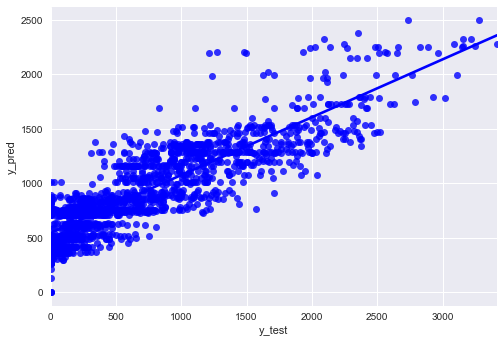

In [295]:
y_test, y_pred = pd.Series(y_test['Rented Bike Count'], name="y_test"), pd.Series(predict(y_pred), name="y_pred")
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

<AxesSubplot:xlabel='y_test', ylabel='y_residual'>

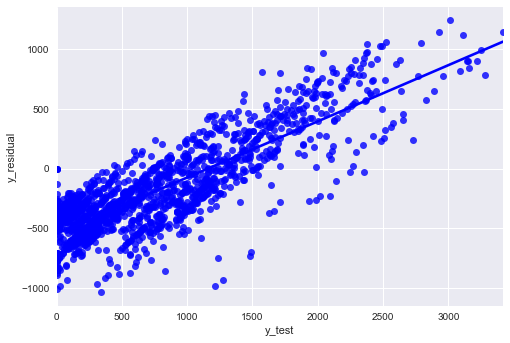

In [309]:
y_residual = pd.Series(np.array(y_test) - np.array(predict(y_pred)), name="y_residual")
sns.regplot(x=y_test, y=y_residual, ci=None, color="b")